In [1]:
#2017年の中学生のデータを取り込み
import pandas as pd
df1 = pd.read_csv('pref_2017.csv')
df1.head()

,2017,f_rate,gaku,life,sports,morals,jison
0,Hokkaido,3.39,65.0,5.10,40.70,4.9,5.1
1,Aomori,2.99,66.3,5.25,42.28,5.3,5.4
2,Iwate,2.56,63.8,5.20,44.22,5.5,5.1
3,Miyagi,4.34,65.0,5.35,42.01,4.8,5.0
4,Akita,2.45,70.0,6.15,44.22,5.9,5.9


In [2]:
#クラスタリングに必要ないので都道府県列,不登校率を削除
df2 = df1.drop(['2017', 'f_rate'], axis = 1)
df2.head()

,gaku,life,sports,morals,jison
0,65.0,5.10,40.70,4.9,5.1
1,66.3,5.25,42.28,5.3,5.4
2,63.8,5.20,44.22,5.5,5.1
3,65.0,5.35,42.01,4.8,5.0
4,70.0,6.15,44.22,5.9,5.9


In [3]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df2)

In [4]:
#PCAで累積寄与率が90%になるように次元圧縮する
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, svd_solver = 'full' )
#新規列への学習と当てはめ
pca_df = pca.fit_transform(sc_df)
pca_df.shape

(47, 3)

In [6]:
#PCAで3次元に削減されたデータにt-sneを実行
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0).fit_transform(pca_df)
tsne.shape

(47, 2)

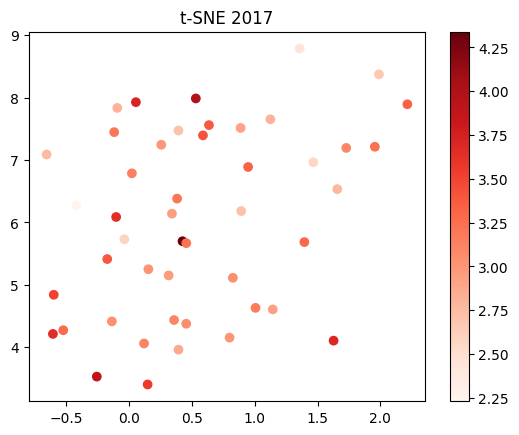

In [7]:
#tsneの結果を不登校率で色分けしてプロット
import matplotlib.pyplot as plt
plt.scatter(tsne[:, 0], tsne[:, 1],cmap='Reds', c = df1['f_rate'])
plt.title('t-SNE 2017')
plt.colorbar()
plt.show()